<a href="https://colab.research.google.com/github/archiechang/study/blob/master/Data%20Analytics/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E5%AE%9F%E8%A3%85/02_%E5%AE%9F%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# データの確認

In [ ]:
#CSVファイル読み込み
df =pd.read_csv("/content/drive/My Drive/data/original.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# レコード数確認
len(df)

506

In [ ]:
# 統計量算出
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 分布の確認

In [ ]:
%matplotlib inline
import seaborn as sns
#!pip install seaborn

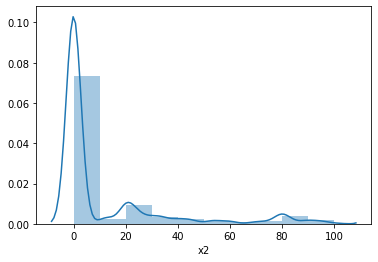

In [ ]:
#　分布の確認
sns.distplot(df["x2"],bins=10)

# 相関関係の確認

[相関係数-CORRELATION](https://atarimae.biz/archives/7966#i)

In [ ]:
#相関係数算出
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# 相関関係を目視する
#sns.pairplot(df)

# 入力変数と出力変数の切り分け

In [ ]:
#X=df.iloc[:,0:13]
#y=df.iloc[:,0:14]
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# モデル構築と検証

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# モデルの宣言
model = LinearRegression()

In [ ]:
#　モデルの学習
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 検証(決定係数の算出)
model.score(X,y)

0.7406426641094094

# 訓練データ(train)と検証データ(test)
例)受験勉強用過去問題10年分購入

良くないケース
- １０年分で勉強
- 10年分で模擬テスト

良いケース
- 前半の5年分の問題で勉強←**訓練データ**
- 後半の5年分の問題を模擬テスト←**検証データ**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#データを分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)#random_state=1は乱数の固定

In [ ]:
#モデルの学習
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#検証←検証データ
model.score(X_test,y_test)


0.7209056672661757

In [ ]:
#検証←訓練データ
model.score(X_train,y_train)

0.7468316520140627

# 予測値の計算

In [ ]:
x=X.iloc[0,:]
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [ ]:
#　予測値の計算
y_pred=model.predict([x])[0]
y_pred

29.423688469405562

# モデルの保存

In [ ]:
from sklearn.externals import joblib

In [ ]:
#モデルの保存
joblib.dump(model,"/content/drive/My Drive/model/model_1.pkl")

['/content/drive/My Drive/model/model_1.pkl']

# モデルの読み込む

In [ ]:
model_new=joblib.load("/content/drive/My Drive/model/model_1.pkl")

In [ ]:
model_new.predict([x])[0]

29.423688469405562

# パラメータの確認

In [ ]:
#パラメータwの値
model.coef_

array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01])

In [ ]:
#numpyの設定→有効桁数3桁、指数関数表示なし
np.set_printoptions(precision=3,suppress=True)

In [ ]:
model.coef_

array([ -0.09 ,   0.067,   0.05 ,   2.186, -17.205,   3.636,   0.002,
        -1.366,   0.29 ,  -0.012,  -0.835,   0.009,  -0.504])